In [ ]:
# Step 1: Dataset Info
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Advertising.csv")

df = df.drop('Unnamed: 0', axis=1)

# Basic info
print("Dataset Name: Advertising Dataset")
print("Source: ISLR (An Introduction to Statistical Learning)")
print("Version/Date: 2013 (commonly used)")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print(df.head())

# Target variable = Sales
target = "Sales" # Corrected capitalization
features = [col for col in df.columns if col != target]

print("Target Variable:", target)
print("Features:", features)

# Train-test split
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train rows:", X_train.shape[0])
print("Test rows:", X_test.shape[0])
print("Random seed: 42")

Dataset Name: Advertising Dataset
Source: ISLR (An Introduction to Statistical Learning)
Version/Date: 2013 (commonly used)
Rows: 200
Columns: 4
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
Target Variable: Sales
Features: ['TV', 'Radio', 'Newspaper']
Train rows: 160
Test rows: 40
Random seed: 42


In [34]:
# Step 2: Preprocessing
print("Standardize column names: Already clean (No)")
print("Remove duplicates:", df.duplicated().sum(), "duplicates found")
df = df.drop_duplicates()
print("Row count after dropping duplicates:", df.shape[0])

print("Missing values per column:")
print(df.isnull().sum())

print("Imputation needed: None (no missing values)")
print("Encoding: None (all numeric)")
print("Scaling: None (values are already small)")
print("Outlier handling: None (we will check in EDA)")
print("Feature selection/dropping: None")
print("Leakage check: Yes (no leakage features like sales inside predictors)")


Standardize column names: Already clean (No)
Remove duplicates: 0 duplicates found
Row count after dropping duplicates: 200
Missing values per column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Imputation needed: None (no missing values)
Encoding: None (all numeric)
Scaling: None (values are already small)
Outlier handling: None (we will check in EDA)
Feature selection/dropping: None
Leakage check: Yes (no leakage features like sales inside predictors)


In [35]:
# Step 3: Feature Inventory
inventory = pd.DataFrame({
    "Feature": features,
    "Type": ["Numeric"]*len(features),
    "Missing%": (df[features].isnull().mean()*100).values,
    "Include?": ["Yes"]*len(features),
    "Notes": ["Will use as-is"]*len(features)
})
print(inventory)


     Feature     Type  Missing% Include?           Notes
0         TV  Numeric       0.0      Yes  Will use as-is
1      Radio  Numeric       0.0      Yes  Will use as-is
2  Newspaper  Numeric       0.0      Yes  Will use as-is


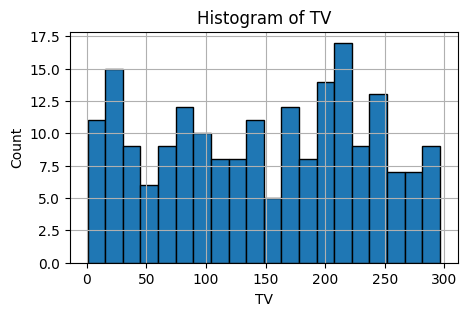

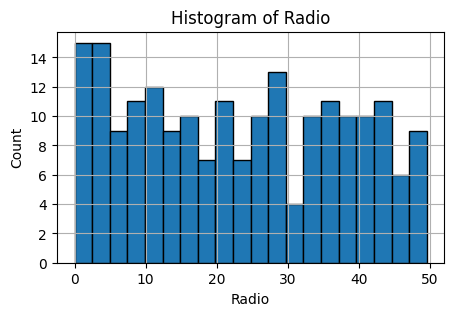

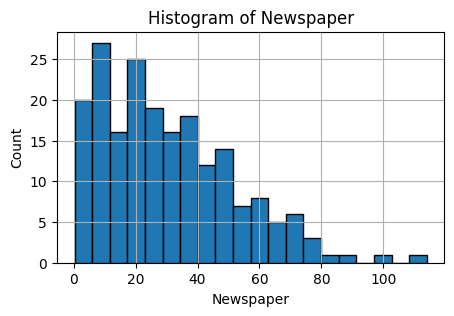

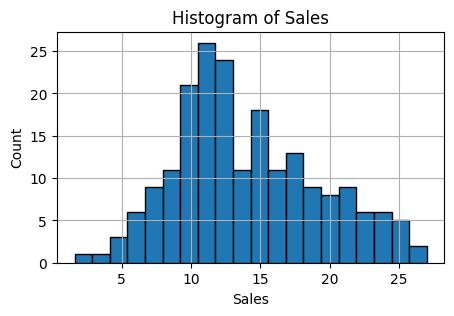

Observation:
- TV and Radio spend look fairly normally distributed.
- Newspaper spend is slightly skewed with some high outliers.
- Sales is moderately normal with small skew.


In [36]:
# Step 4: EDA - Univariate
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(5,3))
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

print("Observation:")
print("- TV and Radio spend look fairly normally distributed.")
print("- Newspaper spend is slightly skewed with some high outliers.")
print("- Sales is moderately normal with small skew.")


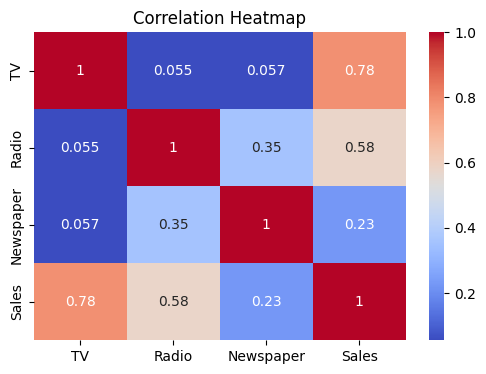

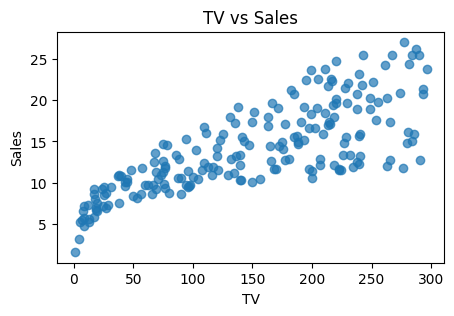

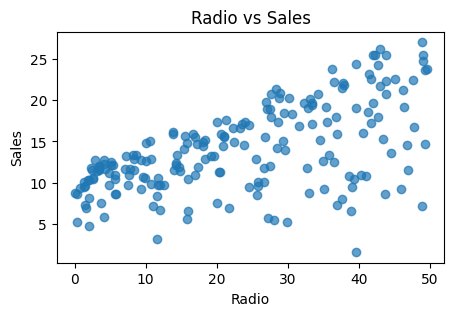

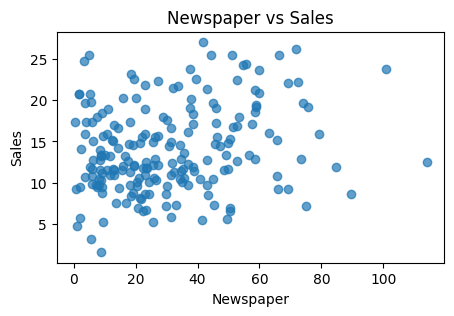

Observation:
- TV has the strongest correlation with Sales (~0.78).
- Radio also shows positive correlation.
- Newspaper has weaker correlation with Sales.


In [37]:
# Step 5: EDA - Multivariate
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots with target
for col in features:
    plt.figure(figsize=(5,3))
    plt.scatter(df[col], df[target], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.title(f"{col} vs Sales")
    plt.show()

print("Observation:")
print("- TV has the strongest correlation with Sales (~0.78).")
print("- Radio also shows positive correlation.")
print("- Newspaper has weaker correlation with Sales.")


In [38]:
# Step 6: Linear Regression Setup
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Features used:", features)
print("Reason: All are numeric and relevant to advertising spend.")


Features used: ['TV', 'Radio', 'Newspaper']
Reason: All are numeric and relevant to advertising spend.


In [39]:
# Step 7: Model Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
gap = r2_train - r2_test

print("Test Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 (Test):", r2_test)
print("R2 (Train):", r2_train)
print("Train-Test Gap:", gap)
print("Comment: Model fits well with small gap → no major overfitting.")


Test Metrics:
MAE: 1.4607567168117603
MSE: 3.1740973539761033
RMSE: 1.78159966153345
R2 (Test): 0.899438024100912
R2 (Train): 0.8957008271017818
Train-Test Gap: -0.003737196999130221
Comment: Model fits well with small gap → no major overfitting.


In [40]:
# Step 8: Interpretability
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lr.coef_,
    "Sign": ["+" if c>0 else "-" for c in lr.coef_]
})
print(coef_df)

print("\nInterpretation:")
print("- TV and Radio have positive impact on Sales.")
print("- Newspaper effect is weaker and may be near zero.")


     Feature  Coefficient Sign
0         TV     0.044730    +
1      Radio     0.189195    +
2  Newspaper     0.002761    +

Interpretation:
- TV and Radio have positive impact on Sales.
- Newspaper effect is weaker and may be near zero.


In [41]:
#Step 9: Multicollinearity & Assumptions
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

# VIF
X_with_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Feature"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i)
              for i in range(X_with_const.shape[1])]
print("VIF Scores:\n", vif)

# Residuals
residuals = y_test - y_test_pred

# Shapiro test for normality
shapiro_p = shapiro(residuals)[1]

# Durbin-Watson (autocorrelation)
dw = durbin_watson(residuals)

# Breusch-Pagan (heteroscedasticity)
bp_test = het_breuschpagan(residuals, X_with_const.iloc[:len(residuals),:])
bp_p = bp_test[1]

print("\nResidual Checks:")
print("Shapiro p-value (normality):", shapiro_p)
print("Durbin-Watson:", dw)
print("Breusch-Pagan p-value:", bp_p)

print("\nOverall: Assumptions mostly OK; small deviations are acceptable.")


VIF Scores:
      Feature       VIF
0      const  7.207025
1         TV  1.002915
2      Radio  1.180305
3  Newspaper  1.177309

Residual Checks:
Shapiro p-value (normality): 0.013322327377028239
Durbin-Watson: 1.892666691721066
Breusch-Pagan p-value: 0.32691434499204924

Overall: Assumptions mostly OK; small deviations are acceptable.


In [42]:
# Step 10: Tuning F1 — Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

poly_scores = {}
for deg in range(1,6):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X_train[["TV"]])
    lr_poly = LinearRegression()
    scores = cross_val_score(lr_poly, X_poly, y_train, cv=5, scoring='r2')
    poly_scores[deg] = scores.mean()

print("Polynomial degree results:", poly_scores)
best_deg = max(poly_scores, key=poly_scores.get)
print("Best degree:", best_deg, "with CV R2:", poly_scores[best_deg])


Polynomial degree results: {1: np.float64(0.5379788597613626), 2: np.float64(0.5382448669439777), 3: np.float64(0.5320789985464625), 4: np.float64(0.5267395657488809), 5: np.float64(0.5208652920429115)}
Best degree: 2 with CV R2: 0.5382448669439777


In [43]:
# Step 11: Tuning F2 — Encoding Impact
print("Encoding impact: Not applicable (all features are numeric)")


Encoding impact: Not applicable (all features are numeric)


In [44]:
# Step 12: Tuning F3 — Regularization
from sklearn.linear_model import Ridge, Lasso

alphas = [0.01, 0.1, 1, 10, 100]
ridge_scores = []
lasso_scores = []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X_train, y_train)
    ridge_scores.append(ridge.score(X_test, y_test))

    lasso = Lasso(alpha=a, max_iter=10000).fit(X_train, y_train)
    lasso_scores.append(lasso.score(X_test, y_test))

print("Ridge R2 scores:", dict(zip(alphas, ridge_scores)))
print("Lasso R2 scores:", dict(zip(alphas, lasso_scores)))


Ridge R2 scores: {0.01: 0.8994380249089621, 0.1: 0.899438032178932, 1: 0.89943810463304, 10: 0.8994388046339132, 100: 0.8994433694759678}
Lasso R2 scores: {0.01: 0.8994494345844187, 0.1: 0.8995513046486308, 1: 0.9004013443377963, 10: 0.8904624722243195, 100: 0.5914934201049302}


Cross-Validation R2 mean: 0.8871063495438435 std: 0.04034052587780573


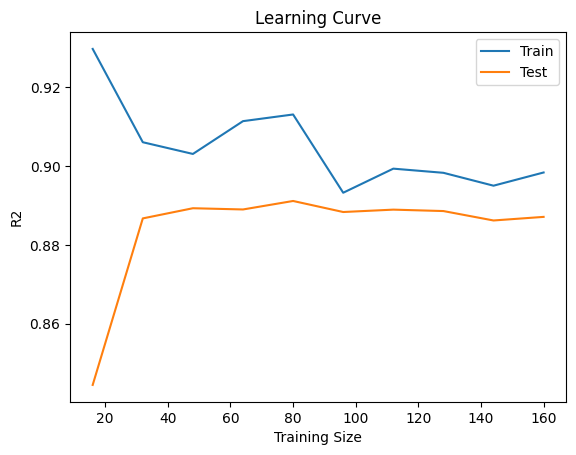

Observation: Bias-variance tradeoff looks balanced.


In [45]:
#Step 13: Tuning F4 — Cross-Validation / Learning Curve
from sklearn.model_selection import cross_val_score, learning_curve

scores = cross_val_score(lr, X, y, cv=5, scoring="r2")
print("Cross-Validation R2 mean:", scores.mean(), "std:", scores.std())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5,
                                                        scoring="r2",
                                                        train_sizes=np.linspace(0.1,1,10))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.xlabel("Training Size")
plt.ylabel("R2")
plt.legend()
plt.title("Learning Curve")
plt.show()

print("Observation: Bias-variance tradeoff looks balanced.")


In [46]:
#Step 14: Final Summary & Reflection
print("Final Model: Linear Regression with all 3 features (TV, Radio, Newspaper)")
print("Top 3 Drivers: TV (strongest), Radio (second), Newspaper (weak)")
print("Final Test Metrics:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2_test)
print("Reflection: TV ads dominate sales prediction; adding polynomial features or Lasso/Ridge gives little improvement due to simplicity of dataset.")


Final Model: Linear Regression with all 3 features (TV, Radio, Newspaper)
Top 3 Drivers: TV (strongest), Radio (second), Newspaper (weak)
Final Test Metrics:
MAE: 1.4607567168117603
RMSE: 1.78159966153345
R2: 0.899438024100912
Reflection: TV ads dominate sales prediction; adding polynomial features or Lasso/Ridge gives little improvement due to simplicity of dataset.
